# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [4]:
#The dataset represents 17 marketing campaigns conducted by the Portuguese bank. These campaigns occurred between May 2008 and November 2010, resulting in a total of 79,354 contacts.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
import seaborn as sns
import time
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier


In [7]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [8]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [10]:
import pandas as pd

# Assuming the dataset is already loaded as df

# 1. Check for missing values (already done previously)
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values[missing_values > 0])

# 2. Encode categorical features using one-hot encoding
# List of categorical features to encode
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 
                        'contact', 'month', 'day_of_week', 'poutcome']

# One-hot encoding the categorical features
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Display the first few rows of the encoded dataframe to verify
df_encoded.head()


Missing Values:
Series([], dtype: int64)


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [12]:
"""
The business objective of this task is to improve the effectiveness of marketing campaigns by predicting whether a customer will subscribe to a term deposit based on previous campaign data.
Specifically, the marketing department of a Portuguese banking institution aims to leverage historical data from multiple marketing campaigns to enhance its future strategies. 
By using machine learning classifiers, the objective is to identify potential customers more likely to respond positively to the campaigns.
"""


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [13]:
# Check the column names in the dataset to ensure we are using the correct target column name
print(df.columns)


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

                             Importance
duration                       0.302439
euribor3m                      0.094091
age                            0.086566
nr.employed                    0.053533
campaign                       0.042390
pdays                          0.029397
cons.conf.idx                  0.029292
poutcome_success               0.023840
emp.var.rate                   0.022916
cons.price.idx                 0.021606
housing_yes                    0.019979
previous                       0.013694
loan_yes                       0.013103
marital_married                0.012681
education_university.degree    0.012583
day_of_week_thu                0.012092
education_high.school          0.011751
day_of_week_mon                0.011615
day_of_week_wed                0.011557
day_of_week_tue                0.011506


<Figure size 1000x600 with 0 Axes>

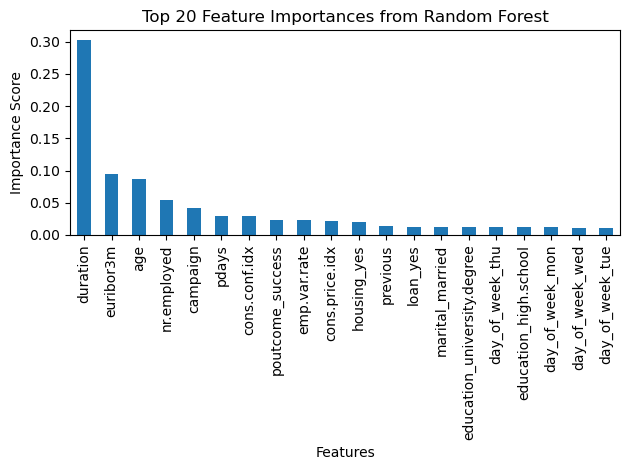

In [15]:


# Split data into features (X) and target (y)
X = df_encoded.drop(columns=['y'])
y = df_encoded['y']

# Initialize and fit RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index=X.columns,
                                   columns=['Importance']).sort_values('Importance', ascending=False)

# Display the most important features
print(feature_importances.head(20))

# Plotting the feature importance as a bar graph
plt.figure(figsize=(10, 6))
feature_importances.head(20).plot(kind='bar', legend=False)
plt.title('Top 20 Feature Importances from Random Forest')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


"""
We selected 11 key features based on their importance in predicting customer subscription to a term deposit. The importance of these features relative to the target feature y ranged between 0.020 and 0.302:

Duration: Length of the last contact (0.302, most important).
Euribor3m: 3-month Euribor interest rate (0.094).
Age: Customer's age (0.087).
Nr.employed: Number of employees in the market (0.054).
Campaign: Number of contacts during the current campaign (0.042).
Pdays: Days since the last contact (0.029).
Cons.conf.idx: Consumer confidence index (0.029).
Poutcome_success: Outcome of the previous campaign (0.024).
Emp.var.rate: Employment variation rate (0.023).
Cons.price.idx: Consumer price index (0.022).
Housing_yes: Whether the customer has a housing loan (0.020).
These features cover personal, economic, and historical factors that are crucial for predicting subscriptions. 
"""

In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Drop the target column 'y' for feature selection, keep all other columns
df_selected = df.drop(columns=['y'])

# Identify all categorical columns that need to be encoded
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 
                        'contact', 'month', 'day_of_week', 'poutcome']

# One-hot encode the categorical variables
df_selected = pd.get_dummies(df_selected, columns=categorical_features, drop_first=True)

# Encode the target column ('y') as binary (1 for 'yes', 0 for 'no')
df_selected['y'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

# List of numerical features to scale
numerical_features = ['age', 'duration', 'campaign', 'pdays', 'previous', 
                      'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 
                      'euribor3m', 'nr.employed']

# Scale the numerical features
scaler = StandardScaler()
df_selected[numerical_features] = scaler.fit_transform(df_selected[numerical_features])

# Separate the features (X) and the target (y)
X = df_selected.drop(columns=['y'])
y = df_selected['y']

# Display the prepared data
df_selected.head()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y
0,1.533034,0.010471,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,False,False,False,True,False,False,False,True,False,0
1,1.628993,-0.421501,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,False,False,False,True,False,False,False,True,False,0
2,-0.290186,-0.124520,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,False,False,False,True,False,False,False,True,False,0
3,-0.002309,-0.413787,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,False,False,False,True,False,False,False,True,False,0
4,1.533034,0.187888,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,False,False,False,True,False,False,False,True,False,0


In [18]:
"""
# Select the relevant features
selected_features = ['duration', 'euribor3m', 'age', 'nr.employed', 'campaign', 'pdays', 
                     'cons.conf.idx', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'housing']

# Create a new dataframe with the selected features
df_selected = df[selected_features]

# Encode categorical variables: 'poutcome' and 'housing'
df_selected = pd.get_dummies(df_selected, columns=['poutcome', 'housing'], drop_first=True)

# Encode the target column ('y') as binary (1 for yes, 0 for no)
df_selected['y'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Scale the numerical features
scaler = StandardScaler()
df_selected[['duration', 'euribor3m', 'age', 'nr.employed', 'campaign', 'pdays', 
             'cons.conf.idx', 'emp.var.rate', 'cons.price.idx']] = scaler.fit_transform(
    df_selected[['duration', 'euribor3m', 'age', 'nr.employed', 'campaign', 'pdays', 
                 'cons.conf.idx', 'emp.var.rate', 'cons.price.idx']])

# Separate the features (X) and the target (y)
X = df_selected.drop(columns=['y'])
y = df_selected['y']

# Display the prepared data
df_selected.head()
"""

"\n# Select the relevant features\nselected_features = ['duration', 'euribor3m', 'age', 'nr.employed', 'campaign', 'pdays', \n                     'cons.conf.idx', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'housing']\n\n# Create a new dataframe with the selected features\ndf_selected = df[selected_features]\n\n# Encode categorical variables: 'poutcome' and 'housing'\ndf_selected = pd.get_dummies(df_selected, columns=['poutcome', 'housing'], drop_first=True)\n\n# Encode the target column ('y') as binary (1 for yes, 0 for no)\ndf_selected['y'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)\n\n# Scale the numerical features\nscaler = StandardScaler()\ndf_selected[['duration', 'euribor3m', 'age', 'nr.employed', 'campaign', 'pdays', \n             'cons.conf.idx', 'emp.var.rate', 'cons.price.idx']] = scaler.fit_transform(\n    df_selected[['duration', 'euribor3m', 'age', 'nr.employed', 'campaign', 'pdays', \n                 'cons.conf.idx', 'emp.var.rate', 'cons.price.idx']])\n\n# S

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [20]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print(f"Training Features Shape: {X_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")
print(f"Training Target Shape: {y_train.shape}")
print(f"Testing Target Shape: {y_test.shape}")

Training Features Shape: (32950, 53)
Testing Features Shape: (8238, 53)
Training Target Shape: (32950,)
Testing Target Shape: (8238,)


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [22]:
# Find the majority class in the training set
majority_class = y_train.mode()[0]

# Predict the majority class for all test instances
y_pred_baseline = np.full_like(y_test, majority_class)

# Calculate the accuracy of the baseline model
baseline_accuracy = (y_pred_baseline == y_test).mean()

print(f"Baseline Model Majority Class: {majority_class}")
print(f"Baseline Model Accuracy: {baseline_accuracy:.4f}")

Baseline Model Majority Class: 0
Baseline Model Accuracy: 0.8865


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

Logistic Regression Model Accuracy: 0.9114
Logistic Regression Model Precision: 0.6705
Logistic Regression Model Recall: 0.4310
Logistic Regression Model F1-Score: 0.5247


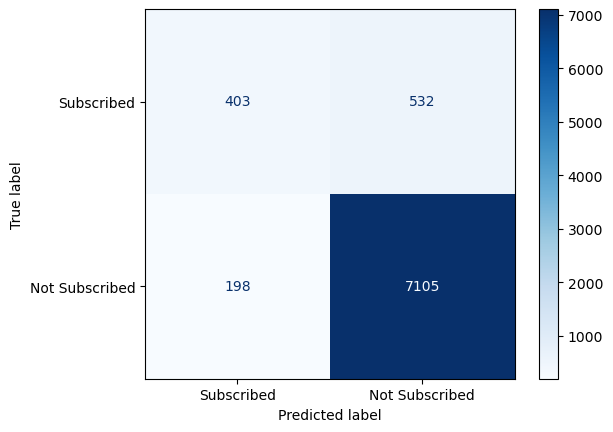

In [24]:

# Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Train the model using the training data
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logreg = log_reg.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred_logreg)
precision = precision_score(y_test, y_pred_logreg)
recall = recall_score(y_test, y_pred_logreg)
f1 = f1_score(y_test, y_pred_logreg)

# Print the evaluation metrics
print(f"Logistic Regression Model Accuracy: {accuracy:.4f}")
print(f"Logistic Regression Model Precision: {precision:.4f}")
print(f"Logistic Regression Model Recall: {recall:.4f}")
print(f"Logistic Regression Model F1-Score: {f1:.4f}")

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_logreg, labels=[1, 0])

# Use ConfusionMatrixDisplay to plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Subscribed', 'Not Subscribed'])
disp.plot(cmap='Blues')  # Set colormap for better visual display

# Show the confusion matrix
plt.show()

# Optionally, save the confusion matrix plot as a PNG file
disp.figure_.savefig('images/confusion_matrix_logreg.png', bbox_inches='tight', dpi=150)


### Problem 9: Score the Model

What is the accuracy of your model?

In [26]:
# Print the evaluation metrics
print(f"Logistic Regression Model Accuracy: {accuracy:.4f}")

Logistic Regression Model Accuracy: 0.9114


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

                 Model  Train Time (s)  Train Accuracy  Test Accuracy
0  Logistic Regression          0.2267          0.9119         0.9114
1  K-Nearest Neighbors          0.0239          0.9286         0.9030
2        Decision Tree          0.1965          1.0000         0.8866
3                  SVM         13.7724          0.9217         0.9111


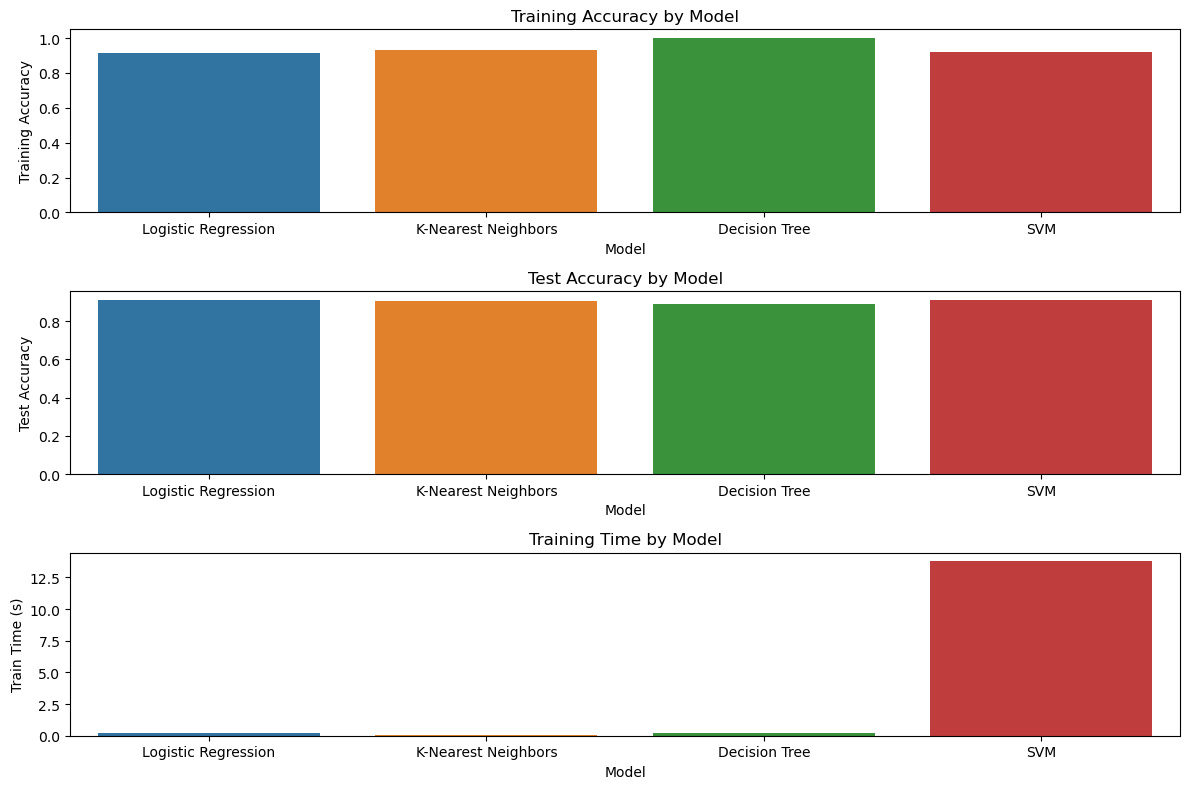

In [28]:

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

# List to store the results
results = []

# Iterate through each model and evaluate performance
for model_name, model in models.items():
    start_time = time.time()  # Record start time
    model.fit(X_train, y_train)  # Train the model
    end_time = time.time()  # Record end time
    
    # Predict on training and test data
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)
    
    # Calculate training time
    train_time = end_time - start_time
    
    # Append results to the list
    results.append({
        'Model': model_name,
        'Train Time (s)': round(train_time, 4),
        'Train Accuracy': round(train_accuracy, 4),
        'Test Accuracy': round(test_accuracy, 4)
    })

# Convert the list to a DataFrame
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

# Plotting the results
plt.figure(figsize=(12, 8))

# Plot for Training Accuracy
plt.subplot(3, 1, 1)
sns.barplot(x='Model', y='Train Accuracy', data=results_df)
plt.title('Training Accuracy by Model')
plt.xlabel('Model')
plt.ylabel('Training Accuracy')
# Save the training accuracy plot
plt.savefig('images/training_accuracy.png', bbox_inches='tight')

# Plot for Test Accuracy
plt.subplot(3, 1, 2)
sns.barplot(x='Model', y='Test Accuracy', data=results_df)
plt.title('Test Accuracy by Model')
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
# Save the test accuracy plot
plt.savefig('images/test_accuracy.png', bbox_inches='tight')

# Plot for Training Time
plt.subplot(3, 1, 3)
sns.barplot(x='Model', y='Train Time (s)', data=results_df)
plt.title('Training Time by Model')
plt.xlabel('Model')
plt.ylabel('Train Time (s)')
# Save the training time plot
plt.savefig('images/train_time.png', bbox_inches='tight')

plt.tight_layout()
plt.show()


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

To improve the model based on feature importance, you want to drop features with an importance score of less than 2%. 
This can help reduce overfitting and improve model interpretability by focusing on the most significant features.
Selected Features:
From the importance list you provided, we'll keep the following features:duration,euribor3m,age,nr.employed,campaign,pdays,cons.conf.idx,poutcome_success,emp.var.rate,cons.price.idx

In [31]:

# Select features with importance >= 2% and include poutcome for encoding
selected_features = ['duration', 'euribor3m', 'age', 'nr.employed', 'campaign', 
                     'pdays', 'cons.conf.idx', 'poutcome', 
                     'emp.var.rate', 'cons.price.idx']

# Create a new dataframe with the selected features
df_selected = df[selected_features]

# One-hot encode 'poutcome' (since it has categories 'success', 'failure', etc.)
df_selected = pd.get_dummies(df_selected, columns=['poutcome'], drop_first=True)

# Encode the target column ('y') as binary (1 for yes, 0 for no)
df_selected['y'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Split the data into features (X) and target (y)
X = df_selected.drop(columns=['y'])
y = df_selected['y']

# Scale the numerical features
scaler = StandardScaler()
X[['duration', 'euribor3m', 'age', 'nr.employed', 'campaign', 'pdays', 'cons.conf.idx', 
   'emp.var.rate', 'cons.price.idx']] = scaler.fit_transform(
    X[['duration', 'euribor3m', 'age', 'nr.employed', 'campaign', 'pdays', 'cons.conf.idx', 
       'emp.var.rate', 'cons.price.idx']])

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Accuracy: 0.9097
Precision: 0.6702
Recall: 0.4021
F1-Score: 0.5027


We will perform hyperparameter tuning for a Decision Tree using max_depth, min_samples_split, min_samples_leaf and criterion. 
We will use GridSearchCV to explore different values of these hyperparameters.

In [33]:
# Define the hyperparameters to tune
tree_params = {
    'max_depth': range(2, 21),  
    'min_samples_split': range(2, 10),  
    'min_samples_leaf': range(1, 5),  
    'criterion': ['gini', 'entropy'] 
}

# Initialize the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Perform Grid Search with 5-fold cross-validation
grid_search_tree = GridSearchCV(dt, tree_params, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search_tree.fit(X_train, y_train)

# Get the best parameters and the corresponding accuracy
best_tree = grid_search_tree.best_estimator_
print(f"Best Decision Tree parameters: {grid_search_tree.best_params_}")
print(f"Best cross-validated accuracy: {grid_search_tree.best_score_:.4f}")

# Evaluate the tuned Decision Tree model on the test set
y_pred_tree = best_tree.predict(X_test)

# Calculate evaluation metrics
accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)

# Print the evaluation metrics
print(f"Tuned Decision Tree Test Accuracy: {accuracy_tree:.4f}")
print(f"Tuned Decision Tree Precision: {precision_tree:.4f}")
print(f"Tuned Decision Tree Recall: {recall_tree:.4f}")
print(f"Tuned Decision Tree F1-Score: {f1_tree:.4f}")


Fitting 5 folds for each of 1216 candidates, totalling 6080 fits
Best Decision Tree parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2}
Best cross-validated accuracy: 0.9131
Tuned Decision Tree Test Accuracy: 0.9148
Tuned Decision Tree Precision: 0.6560
Tuned Decision Tree Recall: 0.5241
Tuned Decision Tree F1-Score: 0.5826


We will tuning the hyperparameters of the K-Nearest Neighbors (KNN) algorithm can significantly improve the model's performance. The hyperparameter to tune for KNN is n_neighbors

In [35]:
# Define the hyperparameters to tune
knn_params = {
    'n_neighbors': range(1, 21),  # Try k values from 1 to 20
}

# Initialize the KNN model
knn = KNeighborsClassifier()

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(knn, knn_params, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and the corresponding accuracy
best_knn = grid_search.best_estimator_
print(f"Best KNN parameters: {grid_search.best_params_}")
print(f"Best cross-validated accuracy: {grid_search.best_score_:.4f}")

# Evaluate the tuned KNN model on the test set
y_pred_knn = best_knn.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)

# Print the evaluation metrics
print(f"Tuned KNN Test Accuracy: {accuracy:.4f}")
print(f"Tuned KNN Precision: {precision:.4f}")
print(f"Tuned KNN Recall: {recall:.4f}")
print(f"Tuned KNN F1-Score: {f1:.4f}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best KNN parameters: {'n_neighbors': 19}
Best cross-validated accuracy: 0.9106
Tuned KNN Test Accuracy: 0.9088
Tuned KNN Precision: 0.6322
Tuned KNN Recall: 0.4706
Tuned KNN F1-Score: 0.5395


##### Questions